In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('MNRAS')
import h5py
from get_flamingo_info import get_flamingo_cosmo

In [2]:
sim_name1 = 'L1000N0900/HYDRO_FIDUCIAL'
sim_name2 = 'L1000N1800/HYDRO_FIDUCIAL'
sim_name3 = 'L1000N3600/HYDRO_FIDUCIAL'
sim_name_list = [sim_name1, sim_name2, sim_name3]

xlabel = r'$\rm M_{star} ~ [M_\odot]$'
ylabel = r'$\rm dn/d\log_{10} M_{star} ~ [h^3 Mpc^{-3}]$'

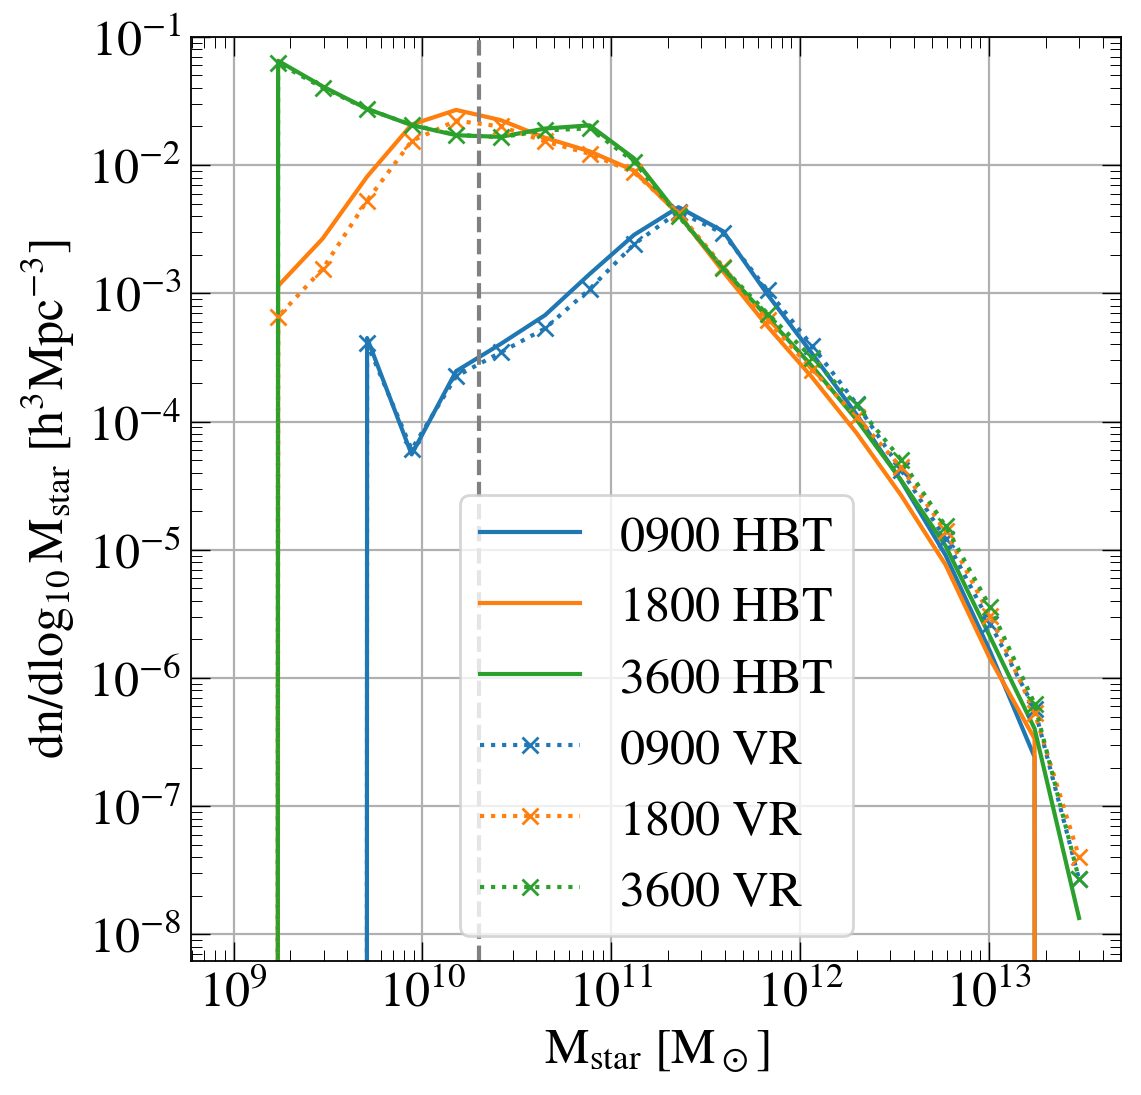

In [11]:
for halofinder in ['HBT', 'VR']:
    if halofinder == 'HBT':
        ls = '-'
        marker=None
    if halofinder == 'VR':
        ls = ':'
        marker = 'x'
    for isim, sim_name in enumerate(sim_name_list):
        label = sim_name[6:10]+' '+halofinder
        output_loc = f'/cosma8/data/do012/dc-wu5/cylinder/output_{sim_name}/stats/'
        Mstar, Phi = np.loadtxt(output_loc+f'SMF_{halofinder}.dat', unpack=True)
        plt.plot(Mstar, Phi, marker=marker, ls=ls, 
                     color=f'C{isim}', label=label)
        
plt.xscale('log')
plt.yscale('log')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.legend()
plt.axvline((2e10), c='gray', ls='--')
plt.ylim(None, 1e-1)
plt.savefig('../../plots/stats/SMF_HBT_VR.png')